In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
with open("/Volumes/Essentials/Internships/Codsoft/Task 2-Movie classification /Genre Classification Dataset/train_data.txt", "rb") as file:
    train_text = file.read().decode('utf-8').lower()
with open("/Volumes/Essentials/Internships/Codsoft/Task 2-Movie classification /Genre Classification Dataset/test_data.txt", "rb") as file:
    test_text = file.read().decode('utf-8').lower()

In [3]:
rows = train_text.split(":::")

# Split the data into lines based on "\n"
lines = train_text.split("\n")

# Initialize empty lists for the four columns
column1 = []
column2 = []
column3 = []
column4 = []

# Split each line into four columns based on the delimiter ":::"
for line in lines:
    columns = line.split(":::")
    if len(columns) == 4:
        column1.append(columns[0])
        column2.append(columns[1])
        column3.append(columns[2])
        column4.append(columns[3])

In [4]:
data_1 = {'name': column2,
          'genre': column3,
          'description': column4}
df = pd.DataFrame(data_1)
df['name'] = df['name'].apply(lambda x: x[:-8])
df

,name,genre,description
0,oscar et la dame rose,drama,listening in to a conversation between his do...
1,cupid,thriller,a brother and sister with a past incestuous r...
2,"young, wild and wonderful",adult,as the bus empties the students for their fie...
3,the secret sin,drama,to help their unemployed father make ends mee...
4,the unrecovered,drama,the film's title refers not only to the un-re...
...,...,...,...
54209,"""bonino""",comedy,this short-lived nbc live sitcom centered on ...
54210,dead girls don't cry,horror,the next generation of exploitation. the sist...
54211,ronald goedemondt: ze bestaan echt,documentary,"ze bestaan echt, is a stand-up comedy about g..."
54212,make your own bed,comedy,walter and vivian live in the country and hav...


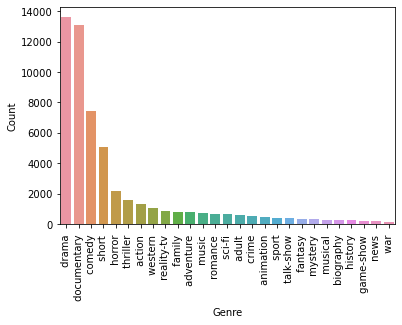

In [5]:
sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts())
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [6]:
rows = test_text.split(":::")

# Split the data into lines based on "\n"
lines = test_text.split("\n")

# Initialize empty lists for the four columns
column1 = []
column2 = []
column3 = []

# Split each line into four columns based on the delimiter ":::"
for line in lines:
    columns = line.split(":::")
    if len(columns) == 3:
        column1.append(columns[0])
        column2.append(columns[1])
        column3.append(columns[2])
        
data_2 = {'name': column2,
          'description': column3}
df1 = pd.DataFrame(data_2)
df1['name'] = df1['name'].apply(lambda x: x[:-8])
df1

,name,description
0,edgar's lunch,"l.r. brane loves his life - his car, his apar..."
1,la guerra de papá,"spain, march 1964: quico is a very naughty ch..."
2,off the beaten track,one year in the life of albin and his family ...
3,meu amigo hindu,"his father has died, he hasn't spoken with hi..."
4,er nu zhai,before he was known internationally as a mart...
...,...,...
54195,"""tales of light & dark""","covering multiple genres, tales of light & da..."
54196,der letzte mohikaner,as alice and cora munro attempt to find their...
54197,oliver twink,a movie 169 years in the making. oliver twist...
54198,slipstream,"popular, but mysterious rock d.j mike mallard..."


In [7]:
non_numeric_cols_df = df.select_dtypes(exclude=[int, float]).columns

label_encoders_df = {}
for col in non_numeric_cols_df:
    label_encoders_df[col] = LabelEncoder()
    df[col] = label_encoders_df[col].fit_transform(df[col])
    
non_numeric_cols_df1 = df1.select_dtypes(exclude=[int, float]).columns

label_encoders_df1 = {}
for col in non_numeric_cols_df1:
    label_encoders_df1[col] = LabelEncoder()
    df1[col] = label_encoders_df1[col].fit_transform(df1[col])

In [8]:
X_train = df.drop(['genre'], axis=1)
Y_train = df['genre']
X_test = df1
X_train.shape, Y_train.shape, X_test.shape

((54214, 2), (54214,), (54200, 2))

In [9]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Random Forest: ", acc_random_forest)

Random Forest:  99.99


In [10]:
for col in df1:
    df1[col] = label_encoders_df1[col].inverse_transform(df1[col])

for col in df:
    df[col] = label_encoders_df[col].inverse_transform(df[col])

In [11]:
Y_pred = label_encoders_df['genre'].inverse_transform(Y_pred)

In [12]:
data_1 = {'name': df1['name'],
          'description': df1['description'],
        'genre': Y_pred}
df_pred_1 = pd.DataFrame(data_1)
# df_pred_1.to_csv("Genres_Dm_Lebe.csv", encoding='utf-8', index=False)
df_pred_1

,name,description,genre
0,edgar's lunch,"l.r. brane loves his life - his car, his apar...",comedy
1,la guerra de papá,"spain, march 1964: quico is a very naughty ch...",thriller
2,off the beaten track,one year in the life of albin and his family ...,comedy
3,meu amigo hindu,"his father has died, he hasn't spoken with hi...",documentary
4,er nu zhai,before he was known internationally as a mart...,drama
...,...,...,...
54195,"""tales of light & dark""","covering multiple genres, tales of light & da...",comedy
54196,der letzte mohikaner,as alice and cora munro attempt to find their...,drama
54197,oliver twink,a movie 169 years in the making. oliver twist...,drama
54198,slipstream,"popular, but mysterious rock d.j mike mallard...",drama
